In [1]:
from PIL import Image
import torch as th
from torchvision import transforms
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
PATH = './../../../cvlabsrc1/cvlab/datasets_victor/'
PATH_MPI_INF_3DHP = PATH+'MPI_INF_3D/'

In [6]:
from glob import glob

In [15]:
images_mpii = glob(PATH_MPII+'S1/Images/*.jpg')
heatmaps = glob(PATH_H36M_heatmaps+'*.png')

In [16]:
print(len(images), len(heatmaps))

239700 262783


In [6]:
import pickle

pickle_path = './../../../cvlabdata2/cvlab/Human36m/OpenPose/train_data.pkl'
with open(pickle_path, 'rb') as f:
    data = pickle.load(f)

In [8]:
one_data = data['Directions'][1]['Directions_1.54138969']['000000']

In [11]:
one_data

{'annotations_3d': array([   0.      ,    0.      ,    0.      ,  123.76886 ,   11.344116,
          47.20117 ,   21.089218,  394.12036 ,  244.9253  ,  146.8992  ,
         827.83307 ,  196.25635 , -123.76907 ,  -11.344147,  -47.200684,
         -81.509705,  420.65765 ,   40.799805,  -32.753586,  869.88245 ,
          86.881836,   67.57315 , -208.67953 ,  -79.99121 ,   36.539597,
        -459.07278 , -129.27686 ,   23.54889 , -565.9275  ,  -73.71631 ,
          57.795944, -649.1797  , -145.28271 ,  -82.35919 , -369.085   ,
        -153.28955 , -193.94012 , -127.55069 ,  -69.70459 , -285.55585 ,
          30.219147,  103.745605,  156.97043 , -395.86948 ,  -63.609375,
         212.52238 , -149.09631 ,   53.856445,  190.62325 ,   41.19568 ,
         217.18652 ], dtype=float32),
 'annotations_2d': array([[484.965, 275.186],
        [485.001, 337.78 ],
        [515.043, 357.025],
        [517.704, 411.478],
        [517.753, 457.777],
        [446.809, 359.55 ],
        [427.798, 419.532],


(1002, 1000, 3)


(700, 200)

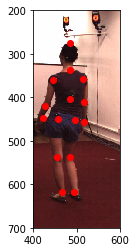

In [17]:
img = plt.imread(images[0])
print(img.shape)
plt.imshow(img, cmap='gray')
plt.plot(one_data['annotations_2d'][:,0], one_data['annotations_2d'][:,1], 'ro')
plt.xlim((400,600))
plt.ylim((700,200))

In [45]:
one_data['annotations_3d'].reshape(-1,3)

array([[   0.      ,    0.      ,    0.      ],
       [ 123.76886 ,   11.344116,   47.20117 ],
       [  21.089218,  394.12036 ,  244.9253  ],
       [ 146.8992  ,  827.83307 ,  196.25635 ],
       [-123.76907 ,  -11.344147,  -47.200684],
       [ -81.509705,  420.65765 ,   40.799805],
       [ -32.753586,  869.88245 ,   86.881836],
       [  67.57315 , -208.67953 ,  -79.99121 ],
       [  36.539597, -459.07278 , -129.27686 ],
       [  23.54889 , -565.9275  ,  -73.71631 ],
       [  57.795944, -649.1797  , -145.28271 ],
       [ -82.35919 , -369.085   , -153.28955 ],
       [-193.94012 , -127.55069 ,  -69.70459 ],
       [-285.55585 ,   30.219147,  103.745605],
       [ 156.97043 , -395.86948 ,  -63.609375],
       [ 212.52238 , -149.09631 ,   53.856445],
       [ 190.62325 ,   41.19568 ,  217.18652 ]], dtype=float32)

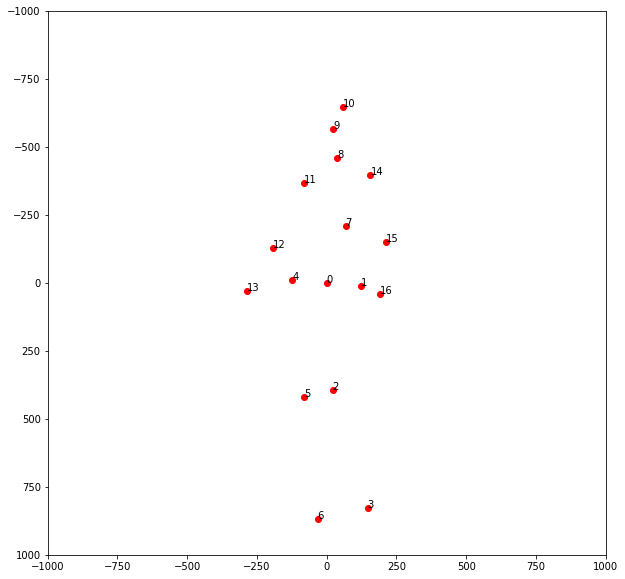

In [86]:

_3d_ = one_data['annotations_3d'].reshape(-1,3)
x_, y_, z_ = _3d_[:,0], _3d_[:,1], _3d_[:,2] 
fig,ax = plt.subplots(1,1,figsize=(10,10))
ax.set_xlim((-1000,1000))
ax.set_ylim((1000,-1000))

ax.plot(x_,y_, 'ro')
for i in range(len(_3d_)):
#     print(_3d_[i])
    plt.annotate(i, (_3d_[i,0], _3d_[i,1]))

In [18]:
one_data['annotations_3d'].shape, one_data['annotations_2d'].shape, 

((51,), (15, 2))

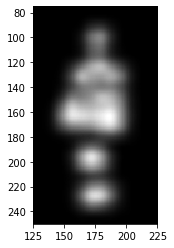

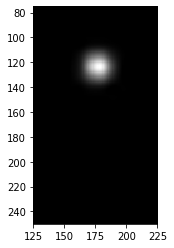

In [23]:
heatmap = plt.imread(PATH_H36M+one_data['heatmap_path'])
heatmap = heatmap.reshape(368,15,368)
plt.imshow(heatmap.sum(axis=1), cmap='gray')
plt.xlim((125,225))
plt.ylim((250,75));
plt.show()
plt.imshow(heatmap[:,1,:], cmap='gray')
plt.xlim((125,225))
plt.ylim((250,75));


In [5]:
import matplotlib.pyplot as plt

(1002, 1000, 3)


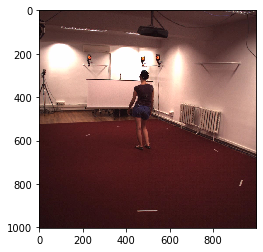

In [7]:
plt.imshow(plt.imread(images[0]))
print(plt.imread(images[0]).shape)